# Neural Network Sample

## Building a neural network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

np.random.seed(7191)

class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float, batch_size: int,
                 validation_split: float, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return

## Importing user/manual dataset and preprocessing according to the model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Assume 'df' is your DataFrame with categorical variables
# Let's say 'categorical_columns' is a list of columns containing categorical data

label_encoder = LabelEncoder()


# Load your dataset
df = pd.read_csv('/content/sample_data/data.csv')


### Pre-processed data, ready to pass for model fitting.

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df = df.drop('id',axis=1)
df =  df.drop('Unnamed: 32',axis=1)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Fitting the model on the imported pre-processed dataset

### Feature extraction using correlation analysis against target variable

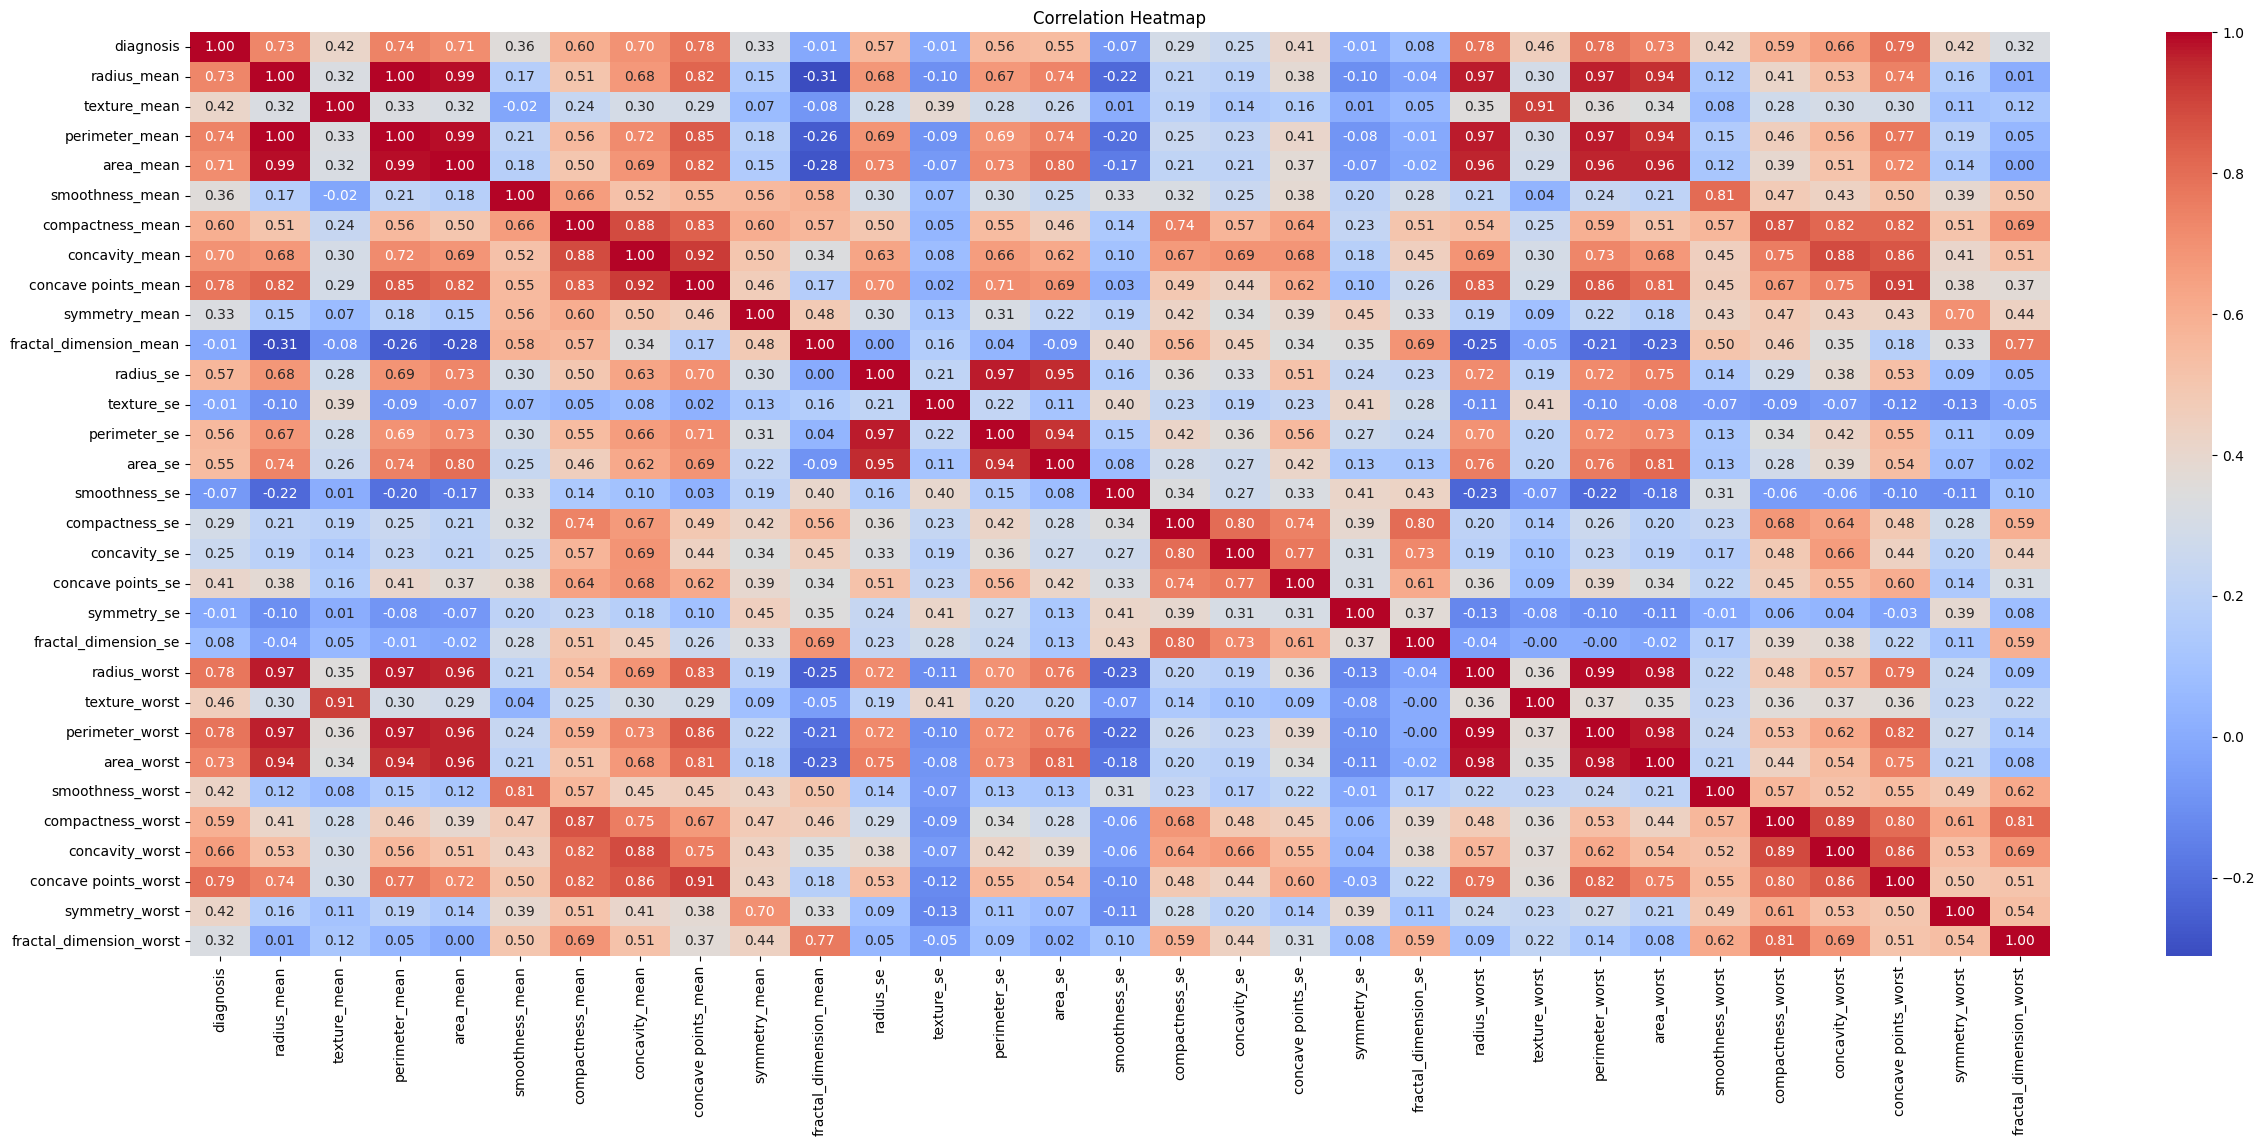

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Feature extraction for model fitting

In [ ]:
# Separate the features and target
X = df[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

In [ ]:
X

,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_worst,perimeter_worst,radius_worst,concave points_mean
0,17.99,122.80,1001.0,0.27760,0.2654,184.60,25.380,0.14710
1,20.57,132.90,1326.0,0.07864,0.1860,158.80,24.990,0.07017
2,19.69,130.00,1203.0,0.15990,0.2430,152.50,23.570,0.12790
3,11.42,77.58,386.1,0.28390,0.2575,98.87,14.910,0.10520
4,20.29,135.10,1297.0,0.13280,0.1625,152.20,22.540,0.10430
...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.2216,166.10,25.450,0.13890
565,20.13,131.20,1261.0,0.10340,0.1628,155.00,23.690,0.09791
566,16.60,108.30,858.1,0.10230,0.1418,126.70,18.980,0.05302
567,20.60,140.10,1265.0,0.27700,0.2650,184.60,25.740,0.15200


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Fitting the Neural network model on the extracted features against the target variable and fine tuning the hyperparameters that will be used to configure the model.

Configuration 1 and 2: 2 neurons in first layer and 1 output layer learning rate: 0.001, 0.01 batch size: 30, 41

Epoch: 0 Train MSE: 0.3914524149398003 Valid MSE: 0.48311461719405563
Epoch: 1 Train MSE: 0.3744178356194832 Valid MSE: 0.461493964562933
Epoch: 2 Train MSE: 0.35886857423992247 Valid MSE: 0.44150672384350365
Epoch: 3 Train MSE: 0.34455778663613185 Valid MSE: 0.42292089484032774
Epoch: 4 Train MSE: 0.3312758124104372 Valid MSE: 0.4055381351017328
Epoch: 5 Train MSE: 0.31884612178493626 Valid MSE: 0.38918996328236155
Epoch: 6 Train MSE: 0.30712158182376254 Valid MSE: 0.37373431961058345
Epoch: 7 Train MSE: 0.2959810358533283 Valid MSE: 0.35905245737961594
Epoch: 8 Train MSE: 0.2853261851873651 Valid MSE: 0.34504613805642753
Epoch: 9 Train MSE: 0.27507875699883294 Valid MSE: 0.3316351014543864
Epoch: 10 Train MSE: 0.26517793747742674 Valid MSE: 0.31875478194767376
Epoch: 11 Train MSE: 0.25557804596716177 Valid MSE: 0.30635424218055074
Epoch: 12 Train MSE: 0.24624642395576737 Valid MSE: 0.2943942972211541
Epoch: 13 Train MSE: 0.23716151268781396 Valid MSE: 0.2828458045704799
Epoch: 0 Trai

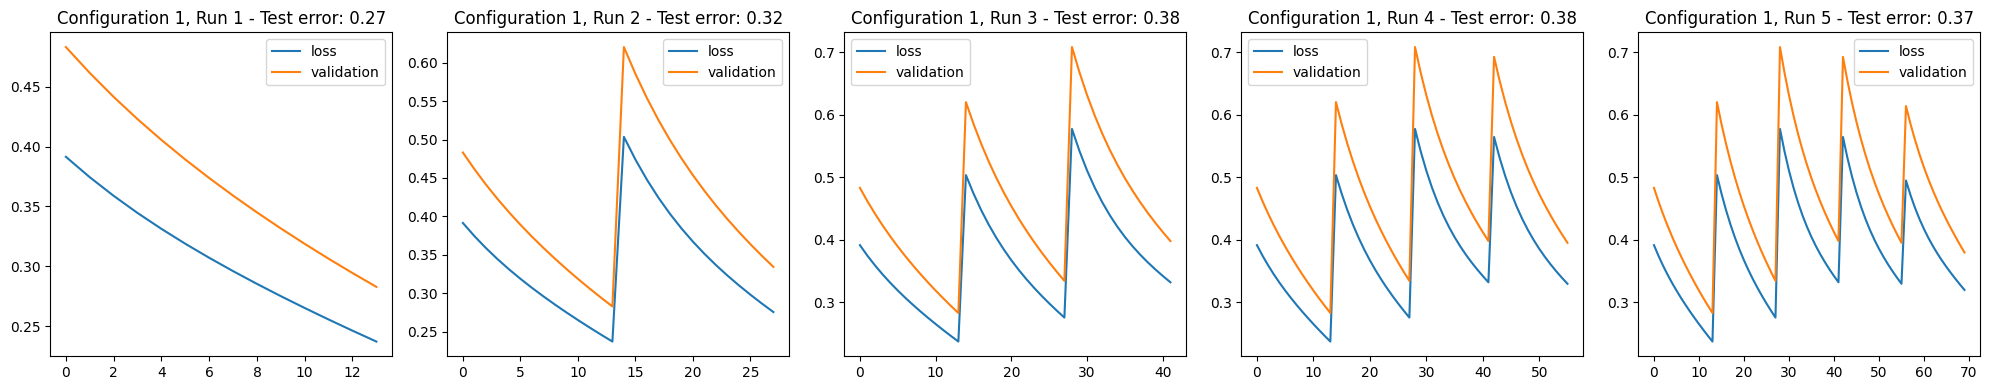

Epoch: 0 Train MSE: 0.6473552826834432 Valid MSE: 0.07389411792372969
Epoch: 1 Train MSE: 0.041630391041321275 Valid MSE: 0.07227253627674621
Epoch: 2 Train MSE: 0.04042338186105185 Valid MSE: 0.07164725511359253
Epoch: 3 Train MSE: 0.039518320640011234 Valid MSE: 0.07102584493761621
Epoch: 4 Train MSE: 0.03882436670171627 Valid MSE: 0.07066080098565088
Epoch: 5 Train MSE: 0.03827672086946479 Valid MSE: 0.07036694293945407
Epoch: 6 Train MSE: 0.037836877086240894 Valid MSE: 0.07016838401636738
Epoch: 7 Train MSE: 0.037476981610923936 Valid MSE: 0.07001728355293835
Epoch: 8 Train MSE: 0.03717779197583677 Valid MSE: 0.06990939473721079
Epoch: 9 Train MSE: 0.036925247386913336 Valid MSE: 0.06982854516565153
Epoch: 10 Train MSE: 0.03670907645045518 Valid MSE: 0.06976880829833276
Epoch: 11 Train MSE: 0.036521586732926326 Valid MSE: 0.06972371956255977
Epoch: 12 Train MSE: 0.03635696359306552 Valid MSE: 0.06968901069368119
Epoch: 13 Train MSE: 0.036210743480558555 Valid MSE: 0.06966129387067

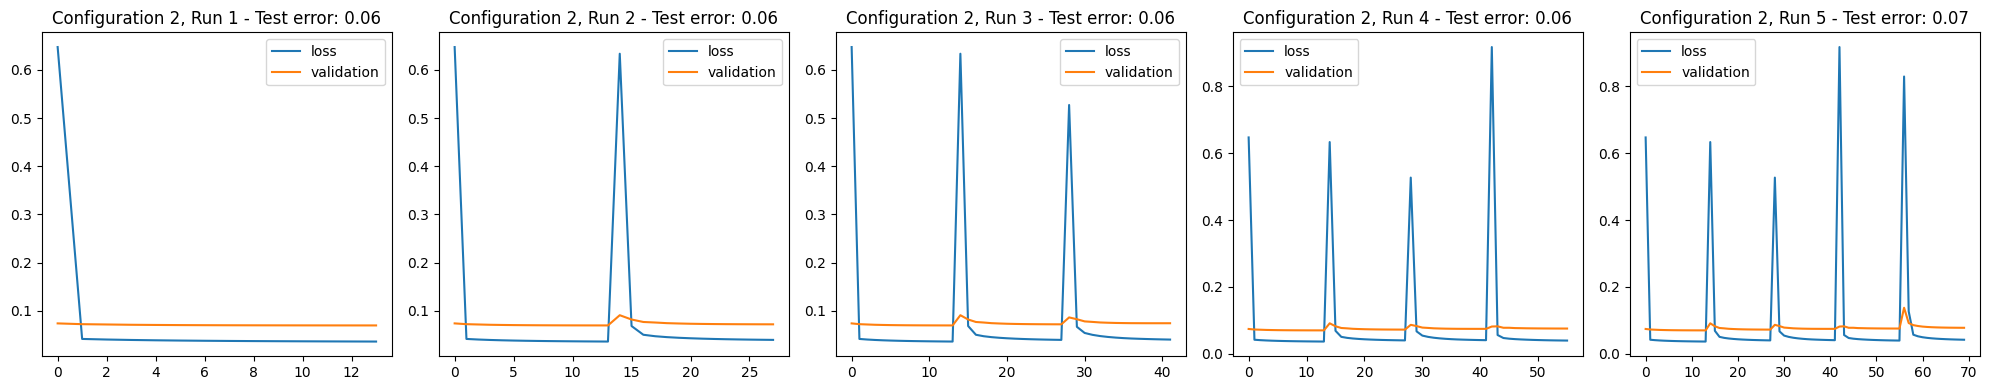

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

configurations_list = [
    # Configuration 1
    {"layers": [X_train.shape[1], 2, 1], "epochs": 14, "learning_rate": 0.001, "batch_size": 30, "validation_split": 0.1},
    # Configuration 2
    {"layers": [X_train.shape[1], 2, 1], "epochs": 14, "learning_rate": 0.01, "batch_size": 41, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
# Run the model multiple times with each configuration
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)
        #turning off vebose
        nn.verbose = False

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        # Print test error
        test_error = mean_squared_error(y_test, y_pred)
        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

Configuration 3 and 4: 3 neurons in first and second layer and 1 output layer learning rate: 0.01 for both batch size: 32, 40

Epoch: 0 Train MSE: 0.6707729484548699 Valid MSE: 0.6421557628630588
Epoch: 1 Train MSE: 0.5719342172025864 Valid MSE: 0.5537807612213527
Epoch: 2 Train MSE: 0.49524474594691215 Valid MSE: 0.4838489434424495
Epoch: 3 Train MSE: 0.4351681730849053 Valid MSE: 0.42824426607517724
Epoch: 4 Train MSE: 0.3880314355553258 Valid MSE: 0.3840685828671428
Epoch: 5 Train MSE: 0.35119116027251174 Valid MSE: 0.34912415734604196
Epoch: 6 Train MSE: 0.3226082514236843 Valid MSE: 0.32164925491256247
Epoch: 7 Train MSE: 0.3006331338060474 Valid MSE: 0.3001861814243047
Epoch: 8 Train MSE: 0.28389968028004536 Valid MSE: 0.2835160292950295
Epoch: 9 Train MSE: 0.27127210856087214 Valid MSE: 0.2706237819534498
Epoch: 0 Train MSE: 0.5376840018475932 Valid MSE: 0.5110100408929105
Epoch: 1 Train MSE: 0.4564101482566295 Valid MSE: 0.43987571050310625
Epoch: 2 Train MSE: 0.3972211097445063 Valid MSE: 0.38720043097130963
Epoch: 3 Train MSE: 0.3542342801774138 Valid MSE: 0.34830148152431045
Epoch: 4 Train MSE: 0.32

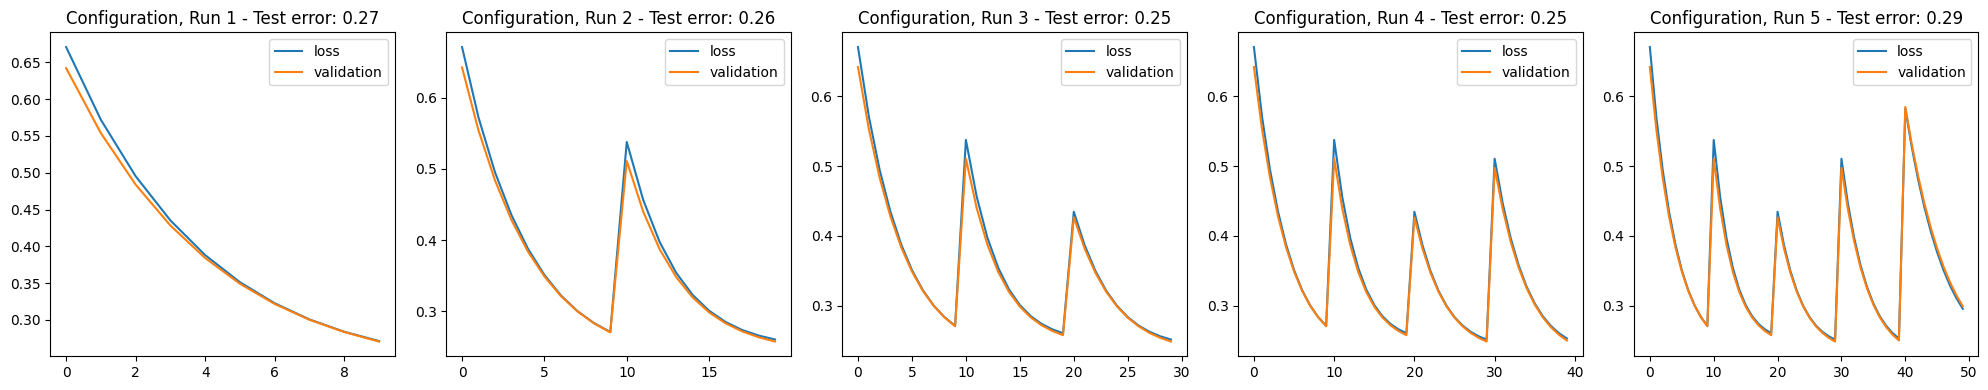

Epoch: 0 Train MSE: 0.4281960213500638 Valid MSE: 0.3711242181157338
Epoch: 1 Train MSE: 0.3529529704304797 Valid MSE: 0.3151586728393425
Epoch: 2 Train MSE: 0.3027254266477396 Valid MSE: 0.27815890923337827
Epoch: 3 Train MSE: 0.269749269877225 Valid MSE: 0.25410234720898484
Epoch: 4 Train MSE: 0.24846392995586777 Valid MSE: 0.23865726114859645
Epoch: 5 Train MSE: 0.23488855421881 Valid MSE: 0.22877884611140034
Epoch: 6 Train MSE: 0.2262486759787289 Valid MSE: 0.2223997357218423
Epoch: 7 Train MSE: 0.22067851132428667 Valid MSE: 0.218165300682984
Epoch: 8 Train MSE: 0.21696721829213333 Valid MSE: 0.21521569664694828
Epoch: 9 Train MSE: 0.21435343587340824 Valid MSE: 0.2130193136246048
Epoch: 10 Train MSE: 0.2123709122721711 Valid MSE: 0.21125416660351407
Epoch: 11 Train MSE: 0.21074011931416428 Valid MSE: 0.20972815362998684
Epoch: 12 Train MSE: 0.20929621827888678 Valid MSE: 0.20832779614426145
Epoch: 0 Train MSE: 0.5135036641883426 Valid MSE: 0.4461729462410787
Epoch: 1 Train MSE: 0

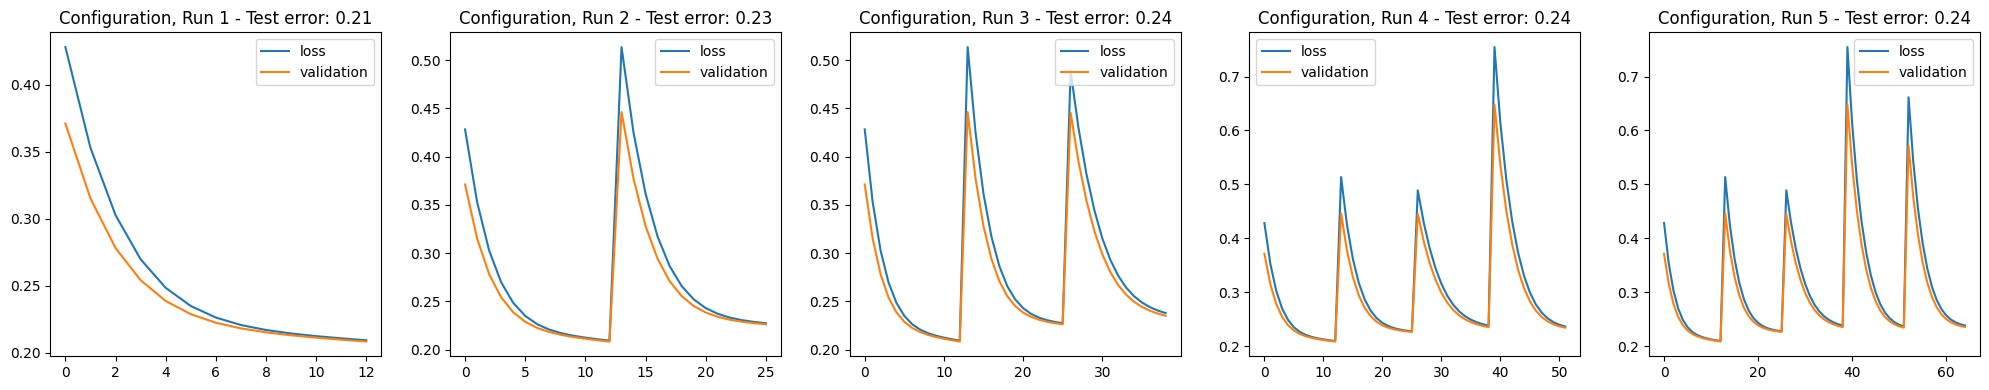

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 3
    {"layers": [X_train.shape[1], 3,2, 1], "epochs": 10, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.3},
    # Configuration 4
    {"layers": [X_train.shape[1], 3,2, 1], "epochs": 13, "learning_rate": 0.001, "batch_size": 40, "validation_split": 0.3}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)
         #turning off vebose
        nn.verbose = False

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


Configuration 5 and 6: increassing the learning rate

Epoch: 0 Train MSE: 0.5963973464832335 Valid MSE: 0.16229905914178205
Epoch: 1 Train MSE: 0.14356006628324303 Valid MSE: 0.07621396105285518
Epoch: 2 Train MSE: 0.06868408191343338 Valid MSE: 0.06740897855312142
Epoch: 3 Train MSE: 0.0598128815761454 Valid MSE: 0.0659356754141066
Epoch: 4 Train MSE: 0.056007139336851745 Valid MSE: 0.06521677377099493
Epoch: 5 Train MSE: 0.05347288535694483 Valid MSE: 0.0648095971986326
Epoch: 6 Train MSE: 0.05163114683961408 Valid MSE: 0.06461696959556182
Epoch: 7 Train MSE: 0.050281104958044595 Valid MSE: 0.0646191163104683
Epoch: 8 Train MSE: 0.049371453335725554 Valid MSE: 0.06460502211611009
Epoch: 9 Train MSE: 0.04864004187973263 Valid MSE: 0.06464931144966918
Epoch: 0 Train MSE: 0.5346744399507525 Valid MSE: 0.19807427184605797
Epoch: 1 Train MSE: 0.1836594414048336 Valid MSE: 0.0919798362880765
Epoch: 2 Train MSE: 0.0874525596847042 Valid MSE: 0.07024295491073705
Epoch: 3 Train MSE: 0.06584050666808548 Valid MSE: 0.0660943207328056
Epoch: 4 Trai

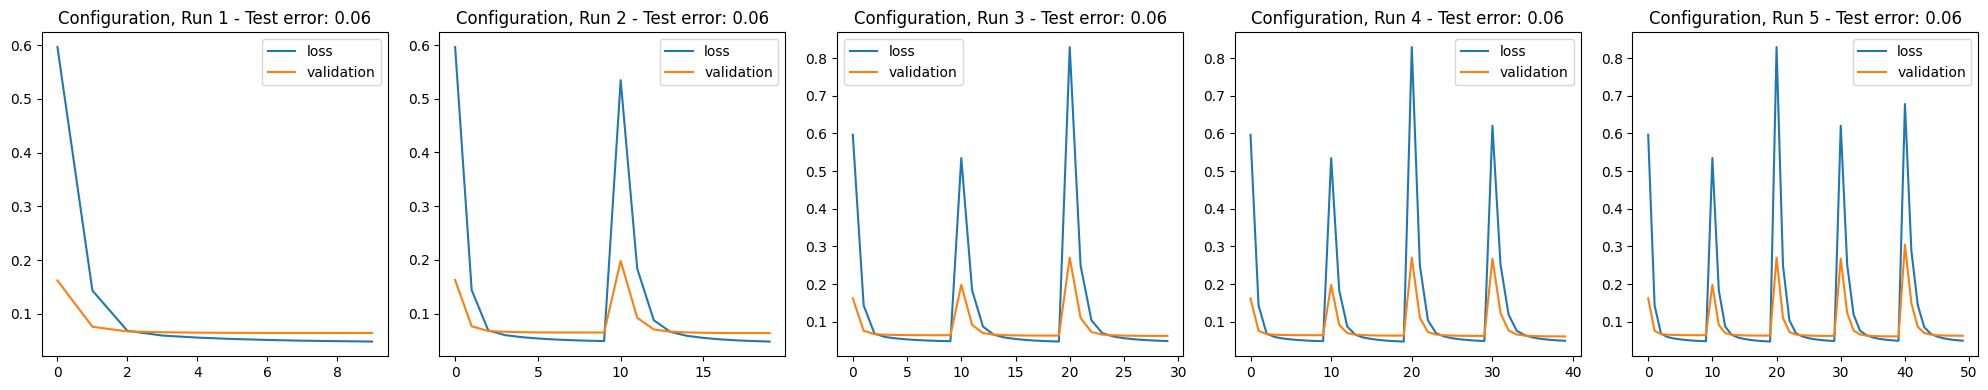

Epoch: 0 Train MSE: 0.6202411542164565 Valid MSE: 1548.49425582789
Epoch: 1 Train MSE: 2070.4483782273373 Valid MSE: 4.764420162961459e+18
Epoch: 2 Train MSE: 6.466768475235863e+18 Valid MSE: 2.0614267140424095e+84
Epoch: 3 Train MSE: 2.7956331325173547e+84 Valid MSE: inf
Epoch: 4 Train MSE: inf Valid MSE: nan
Epoch: 5 Train MSE: nan Valid MSE: nan
Epoch: 6 Train MSE: nan Valid MSE: nan
Epoch: 7 Train MSE: nan Valid MSE: nan
Epoch: 8 Train MSE: nan Valid MSE: nan
Epoch: 9 Train MSE: nan Valid MSE: nan
Epoch: 10 Train MSE: nan Valid MSE: nan
Epoch: 11 Train MSE: nan Valid MSE: nan
Epoch: 12 Train MSE: nan Valid MSE: nan
NaN values found in predictions. Skipping this run.
Epoch: 0 Train MSE: 0.7289364664492697 Valid MSE: 4481.936307714644
Epoch: 1 Train MSE: 6006.845700421322 Valid MSE: 4.078282472593772e+20
Epoch: 2 Train MSE: 5.5345522636881e+20 Valid MSE: 3.2097778862923147e+92
Epoch: 3 Train MSE: 4.352907521714689e+92 Valid MSE: inf
Epoch: 4 Train MSE: inf Valid MSE: nan
Epoch: 5 Tra

<ipython-input-17-1521f367b836>:90: RuntimeWarning: overflow encountered in square
  return (actual - predicted) ** 2
<ipython-input-17-1521f367b836>:41: RuntimeWarning: overflow encountered in square
  epoch_losses.append(np.mean(loss ** 2))
<ipython-input-17-1521f367b836>:103: RuntimeWarning: overflow encountered in matmul
  grad = grad @ self.__layers[i][0].T
<ipython-input-17-1521f367b836>:95: RuntimeWarning: invalid value encountered in multiply
  grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))
<ipython-input-17-1521f367b836>:97: RuntimeWarning: overflow encountered in matmul
  w_grad = hidden[i].T @ grad



Epoch: 1 Train MSE: 1647.2623327491729 Valid MSE: 2.0689048774139643e+18
Epoch: 2 Train MSE: 2.8074919246861445e+18 Valid MSE: 5.826895169729387e+82
Epoch: 3 Train MSE: 7.902054225719778e+82 Valid MSE: inf
Epoch: 4 Train MSE: inf Valid MSE: nan
Epoch: 5 Train MSE: nan Valid MSE: nan
Epoch: 6 Train MSE: nan Valid MSE: nan
Epoch: 7 Train MSE: nan Valid MSE: nan
Epoch: 8 Train MSE: nan Valid MSE: nan
Epoch: 9 Train MSE: nan Valid MSE: nan
Epoch: 10 Train MSE: nan Valid MSE: nan
Epoch: 11 Train MSE: nan Valid MSE: nan
Epoch: 12 Train MSE: nan Valid MSE: nan
NaN values found in predictions. Skipping this run.


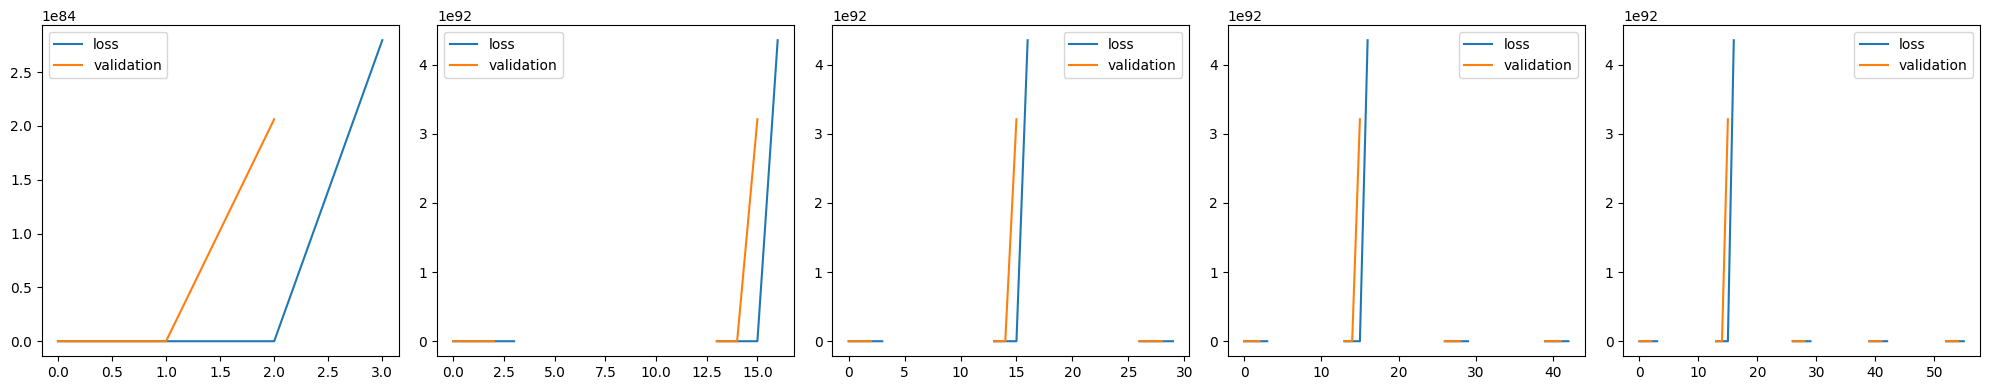

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
configurations_list = [
    # Configuration 5
    {"layers": [X_train.shape[1], 2, 1], "epochs": 10, "learning_rate": 0.01, "batch_size": 32, "validation_split": 0.3},
    # Configuration 6
    {"layers": [X_train.shape[1], 2, 1], "epochs": 13, "learning_rate": 0.1, "batch_size": 32, "validation_split": 0.3}
]
# Run the model multiple times with each configuration
i1=2
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        if np.isnan(y_pred).any():
            print("NaN values found in predictions. Skipping this run.")
            continue
        valid_indices = ~np.isnan(y_test).flatten()
        y_test_valid = y_test[valid_indices]
        y_pred_valid = y_pred[valid_indices]

    # Calculate test error

        test_error = mean_squared_error(y_test_valid, y_pred_valid)
        plt.title(f"Configuration, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()


incressing batch size

Epoch: 0 Train MSE: 0.772942476175085 Valid MSE: 0.5488641267936136
Epoch: 1 Train MSE: 0.653286435033672 Valid MSE: 0.47027406459508425
Epoch: 2 Train MSE: 0.5557899196104542 Valid MSE: 0.4067148425599306
Epoch: 3 Train MSE: 0.47520158926357725 Valid MSE: 0.35456971892196604
Epoch: 4 Train MSE: 0.407683999806891 Valid MSE: 0.31118695906354976
Epoch: 5 Train MSE: 0.3504486921033523 Valid MSE: 0.2746506961090791
Epoch: 6 Train MSE: 0.30148888052280326 Valid MSE: 0.24359801772253512
Epoch: 7 Train MSE: 0.25937258958567744 Valid MSE: 0.2170694140381197
Epoch: 8 Train MSE: 0.2230778925814266 Valid MSE: 0.19438673510838358
Epoch: 9 Train MSE: 0.19186146351139086 Valid MSE: 0.1750811461832991
Epoch: 10 Train MSE: 0.16515631896418306 Valid MSE: 0.1588282786589152
Epoch: 11 Train MSE: 0.14253813053510295 Valid MSE: 0.14528096399589366
Epoch: 0 Train MSE: 0.7243199227753752 Valid MSE: 0.5267261033259591
Epoch: 1 Train MSE: 0.6267896674442358 Valid MSE: 0.46055993180276283
Epoch: 2 Train MSE: 0.

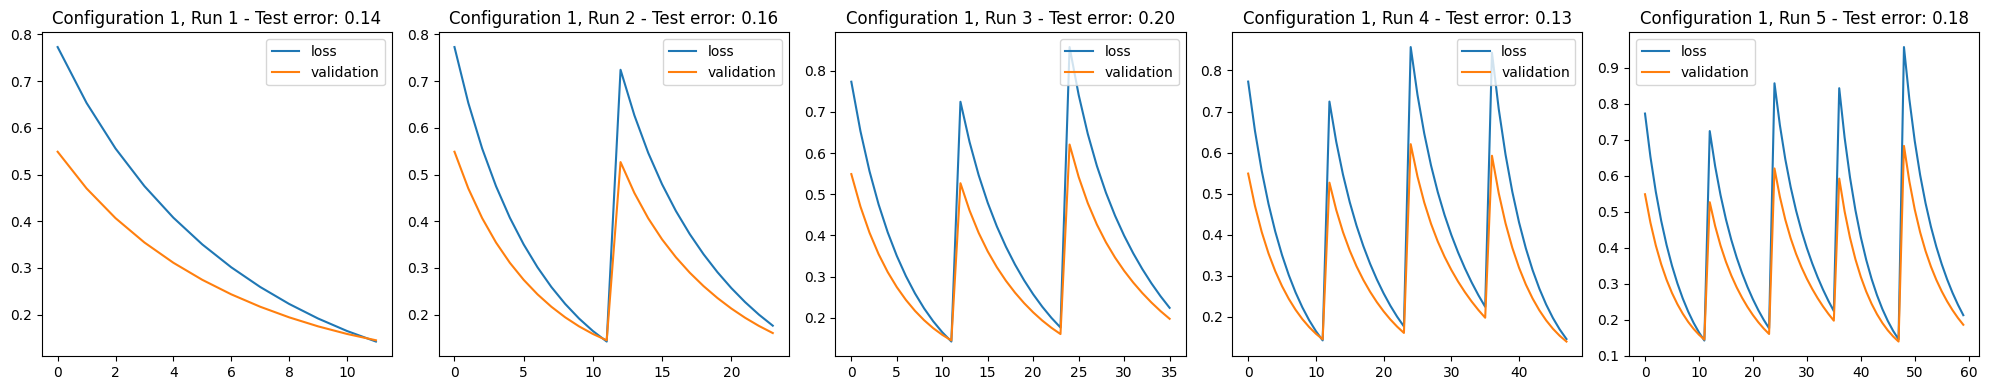

Epoch: 0 Train MSE: 0.813346236851517 Valid MSE: 0.568806992990428
Epoch: 1 Train MSE: 0.6582383929650639 Valid MSE: 0.4714461207605701
Epoch: 2 Train MSE: 0.5415809800749471 Valid MSE: 0.3981849332637487
Epoch: 3 Train MSE: 0.45084839493372514 Valid MSE: 0.34098500543097066
Epoch: 4 Train MSE: 0.3778287983066658 Valid MSE: 0.29466281591322996
Epoch: 5 Train MSE: 0.3173242129868776 Valid MSE: 0.25606228292319766
Epoch: 6 Train MSE: 0.26622623467409107 Valid MSE: 0.2233991154698576
Epoch: 7 Train MSE: 0.22280243648801734 Valid MSE: 0.1957348596237247
Epoch: 8 Train MSE: 0.18613140379870868 Valid MSE: 0.17256974010504345
Epoch: 9 Train MSE: 0.15569878408497823 Valid MSE: 0.1536245727606831
Epoch: 10 Train MSE: 0.1310989681303983 Valid MSE: 0.1383849855946018
Epoch: 11 Train MSE: 0.11156280693502521 Valid MSE: 0.12648262502835375
Epoch: 0 Train MSE: 0.5338823742616137 Valid MSE: 0.39980866925876657
Epoch: 1 Train MSE: 0.45758761822157723 Valid MSE: 0.34913500839900086
Epoch: 2 Train MSE: 

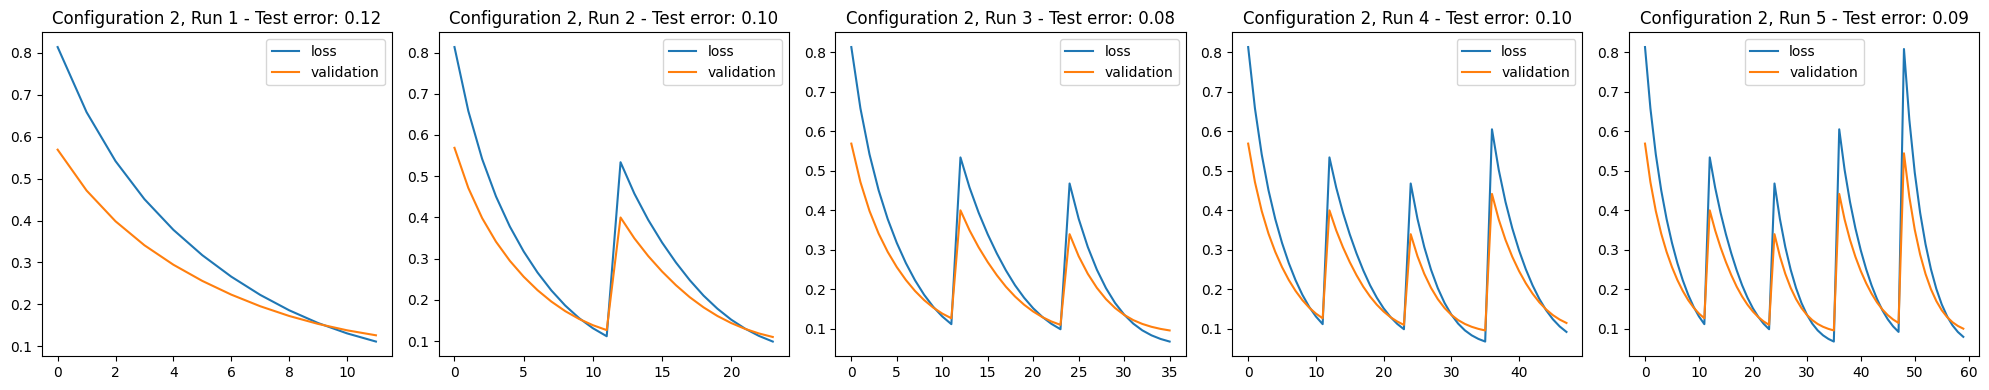

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

configurations_list = [
    # Configuration 7
    {"layers": [X_train.shape[1], 2, 1], "epochs": 12, "learning_rate": 0.001, "batch_size": 50, "validation_split": 0.2},
    # Configuration 8
    {"layers": [X_train.shape[1], 2, 1], "epochs": 12, "learning_rate": 0.001, "batch_size": 70, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
# Run the model multiple times with each configuration
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        # Print test error
        test_error = mean_squared_error(y_test, y_pred)
        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

Configuration 9 and 10: Added few more features

In [ ]:
# Separate the features and target
X = df[['radius_mean','perimeter_mean','radius_se','perimeter_se','area_mean','compactness_mean','concave points_worst','area_worst','perimeter_worst','radius_worst','concave points_mean']]
y = df['diagnosis']

Epoch: 0 Train MSE: 0.6484855458570543 Valid MSE: 0.5245210874504836
Epoch: 1 Train MSE: 0.5958086260211426 Valid MSE: 0.48462952305610396
Epoch: 2 Train MSE: 0.5491255607036822 Valid MSE: 0.4494222589747131
Epoch: 3 Train MSE: 0.5074652538696214 Valid MSE: 0.4181014317076687
Epoch: 4 Train MSE: 0.4700122472532965 Valid MSE: 0.3900011624917986
Epoch: 5 Train MSE: 0.4360868708112999 Valid MSE: 0.36457152464679476
Epoch: 6 Train MSE: 0.40512808004598244 Valid MSE: 0.3413641057309773
Epoch: 7 Train MSE: 0.37667823537157563 Valid MSE: 0.32001881298225726
Epoch: 8 Train MSE: 0.3503693501711457 Valid MSE: 0.3002517051356147
Epoch: 9 Train MSE: 0.3259105087358364 Valid MSE: 0.28184371799840385
Epoch: 10 Train MSE: 0.30307626811756316 Valid MSE: 0.2646302056468854
Epoch: 11 Train MSE: 0.28169593277634053 Valid MSE: 0.24849125698971958
Epoch: 12 Train MSE: 0.2616436431636364 Valid MSE: 0.23334277631212633
Epoch: 13 Train MSE: 0.24282925815588033 Valid MSE: 0.21916567540362059
Epoch: 14 Train MS

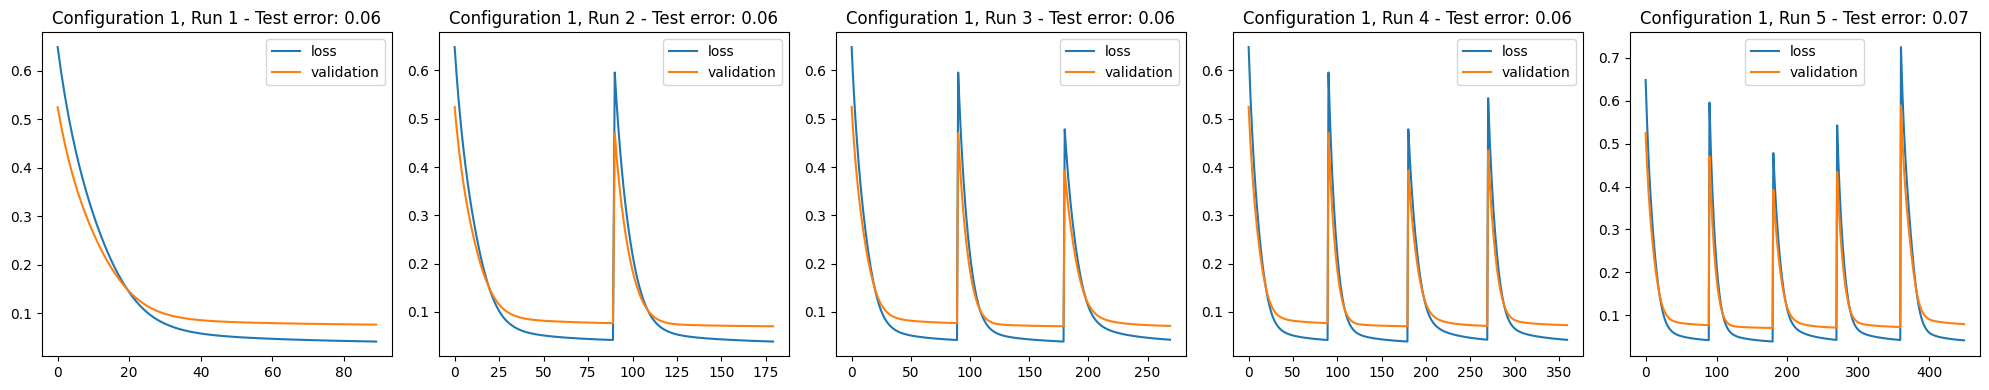

Epoch: 0 Train MSE: 0.6012651912997901 Valid MSE: 0.45491485456074626
Epoch: 1 Train MSE: 0.526520252924759 Valid MSE: 0.40066047526872467
Epoch: 2 Train MSE: 0.46240810057131226 Valid MSE: 0.354257147790927
Epoch: 3 Train MSE: 0.40698852681570086 Valid MSE: 0.3142924363469266
Epoch: 4 Train MSE: 0.35879026855707263 Valid MSE: 0.27969492582063754
Epoch: 5 Train MSE: 0.31669136239274864 Valid MSE: 0.24962904151627596
Epoch: 6 Train MSE: 0.27981297614474776 Valid MSE: 0.22345500668522705
Epoch: 7 Train MSE: 0.2474670785381728 Valid MSE: 0.20066784323307404
Epoch: 8 Train MSE: 0.219103387233529 Valid MSE: 0.18087211787994556
Epoch: 9 Train MSE: 0.19428335828955265 Valid MSE: 0.1637450438673849
Epoch: 10 Train MSE: 0.17264113148075422 Valid MSE: 0.14900221336160516
Epoch: 11 Train MSE: 0.1538596671971188 Valid MSE: 0.13638854741939455
Epoch: 12 Train MSE: 0.13765390849856846 Valid MSE: 0.1256717226448856
Epoch: 13 Train MSE: 0.12375989700782553 Valid MSE: 0.11663111603451602
Epoch: 14 Trai

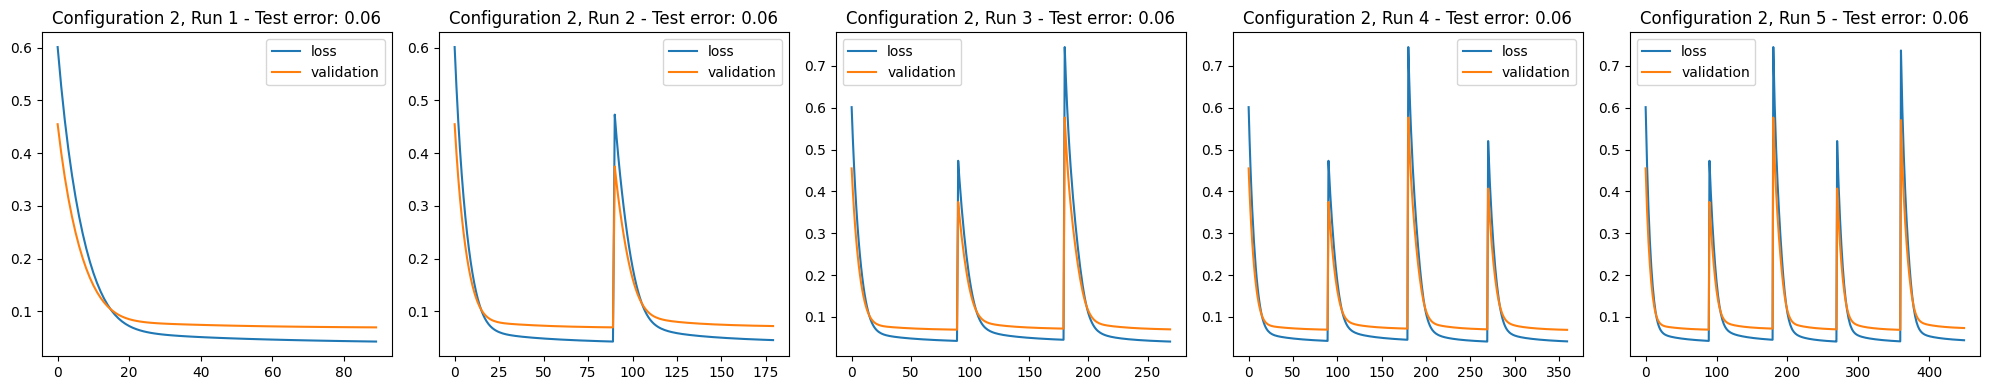

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

configurations_list = [
    # Configuration 9
    {"layers": [X_train.shape[1], 2, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.2},
    # Configuration 10
    {"layers": [X_train.shape[1], 2, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 40, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
# Run the model multiple times with each configuration
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(5):
        # Fit the model to the training data
        nn.fit(X_train, y_train)


        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 5, i+1)
        nn.plot_learning()

        # Print test error
        test_error = mean_squared_error(y_test, y_pred)
        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

Epoch: 0 Train MSE: 0.6333368400262218 Valid MSE: 0.5035531914703897
Epoch: 1 Train MSE: 0.5735183766514977 Valid MSE: 0.4572806140572048
Epoch: 2 Train MSE: 0.5206750897979944 Valid MSE: 0.4164611654241487
Epoch: 3 Train MSE: 0.4737560400258424 Valid MSE: 0.3802478522068204
Epoch: 4 Train MSE: 0.43187317799738695 Valid MSE: 0.34794208400623783
Epoch: 5 Train MSE: 0.3942928485213838 Valid MSE: 0.3189779005606783
Epoch: 6 Train MSE: 0.3604122434850713 Valid MSE: 0.2929003911279346
Epoch: 7 Train MSE: 0.32973914243469593 Valid MSE: 0.26932656353636625
Epoch: 8 Train MSE: 0.3018741275255585 Valid MSE: 0.2479542101382739
Epoch: 9 Train MSE: 0.2764947826379805 Valid MSE: 0.22856400313687902
Epoch: 10 Train MSE: 0.25334159740731266 Valid MSE: 0.21095635528156212
Epoch: 11 Train MSE: 0.23220543165863805 Valid MSE: 0.19496207785900668
Epoch: 12 Train MSE: 0.21291647654142432 Valid MSE: 0.18045118084837283
Epoch: 13 Train MSE: 0.1953346898332523 Valid MSE: 0.16731441788783555
Epoch: 14 Train MS

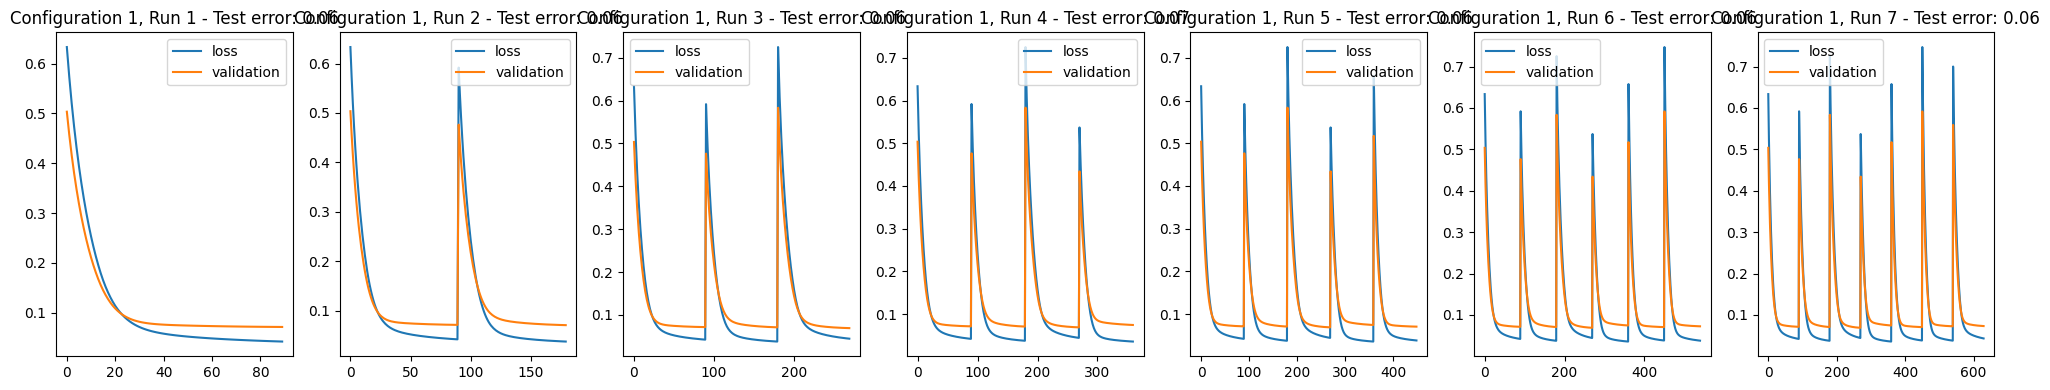

Epoch: 0 Train MSE: 0.6565255871139193 Valid MSE: 0.5195185957096268
Epoch: 1 Train MSE: 0.5983996835053724 Valid MSE: 0.4787371148725501
Epoch: 2 Train MSE: 0.5484416265515671 Valid MSE: 0.44375288378390365
Epoch: 3 Train MSE: 0.5047911294382336 Valid MSE: 0.41315502774322327
Epoch: 4 Train MSE: 0.46594951913895477 Valid MSE: 0.3858318318801988
Epoch: 5 Train MSE: 0.4307382928002118 Valid MSE: 0.3609312972670924
Epoch: 6 Train MSE: 0.3982605827438018 Valid MSE: 0.3378245221113413
Epoch: 7 Train MSE: 0.3678646593624662 Valid MSE: 0.3160717515396287
Epoch: 8 Train MSE: 0.33910900551304846 Valid MSE: 0.295390840034872
Epoch: 9 Train MSE: 0.31172855139826894 Valid MSE: 0.2756277306370284
Epoch: 10 Train MSE: 0.28560164191466103 Valid MSE: 0.25672852620272835
Epoch: 11 Train MSE: 0.2607174117190705 Valid MSE: 0.2387128790755552
Epoch: 12 Train MSE: 0.2371435539803633 Valid MSE: 0.22164874322273984
Epoch: 13 Train MSE: 0.21499496327777923 Valid MSE: 0.20562893428980536
Epoch: 14 Train MSE: 

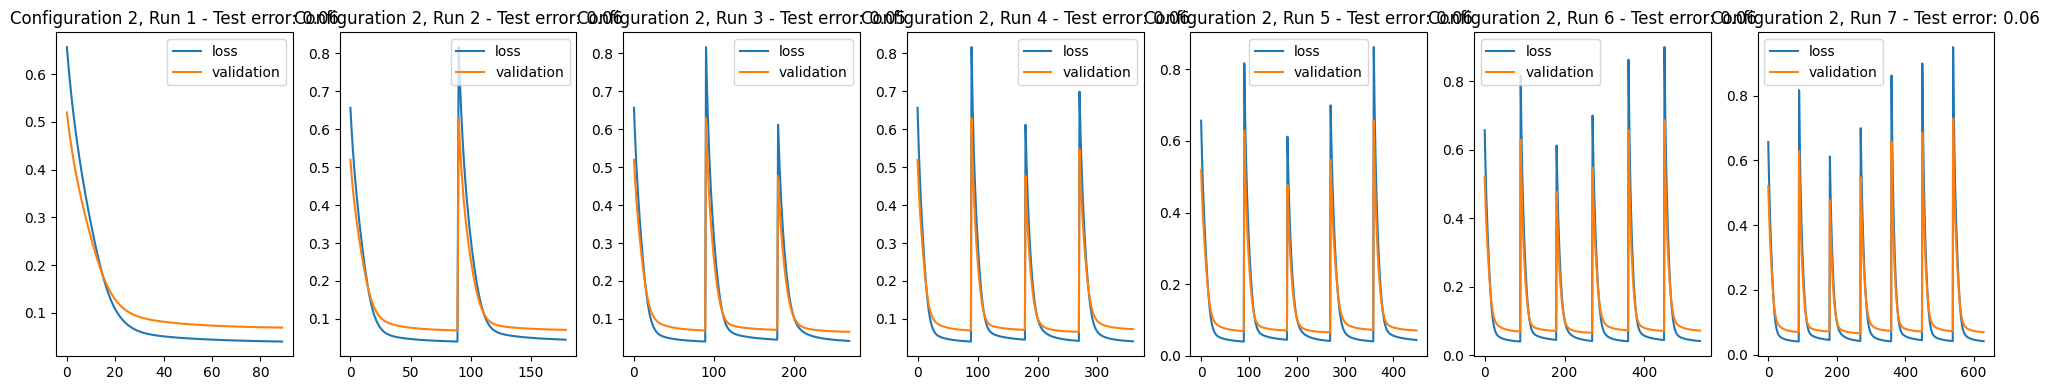

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

configurations_list = [
    # Configuration 9
    {"layers": [X_train.shape[1], 2, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 32, "validation_split": 0.2},
    # Configuration 10
    {"layers": [X_train.shape[1], 2, 1], "epochs": 90, "learning_rate": 0.001, "batch_size": 40, "validation_split": 0.2}
]
# Run the model multiple times with each configuration
# Run the model multiple times with each configuration
for idx, config in enumerate(configurations_list):
    # Initialize the neural network with the current configuration
    nn = Neural(**config)

    # Create a new figure for each configuration
    plt.figure(figsize=(20, 4))

    # Run the model multiple times (5 times in this case)
    for i in range(7):
        # Fit the model to the training data
        nn.fit(X_train, y_train)

        # Predict on the test data
        y_pred = nn.predict(X_test)

        # Plot the learning curve
        plt.subplot(1, 7, i+1)
        nn.plot_learning()

        # Print test error
        test_error = mean_squared_error(y_test, y_pred)
        plt.title(f"Configuration {idx+1}, Run {i+1} - Test error: {test_error:.2f}")

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()